In [2]:
import pandas as pd
import numpy as np
import requests

## contest.list

Returns information about all available contests.

| Parameter | Description |
| --- |  --- |
| **gym** | Boolean. If true --- than gym contests are returned. Otherwide, regular contests are returned. |


**Return value**: Returns a list of [Contest](https://codeforces.com/apiHelp/objects#Contest) objects. If this method is called not anonymously, then all available contests for a calling user will be returned too, including mashups and private gyms.

#### Contest

Represents a contest on Codeforces.

| Field | Description |
| --- |  --- |
| id | Integer. |
| name | String. Localized. |
| type | Enum: CF, IOI, ICPC. Scoring system used for the contest. |
| phase | Enum: BEFORE, CODING, PENDING\_SYSTEM\_TEST, SYSTEM\_TEST, FINISHED. |
| frozen | Boolean. If true, then the ranklist for the contest is frozen and shows only submissions, created before freeze. |
| durationSeconds | Integer. Duration of the contest in seconds. |
| startTimeSeconds | Integer. Can be absent. Contest start time in unix format. |
| relativeTimeSeconds | Integer. Can be absent. Number of seconds, passed after the start of the contest. Can be negative. |

**Example**: <https://codeforces.com/api/contest.list?gym=true>

In [3]:
contest_list=requests.get("https://codeforces.com/api/contest.list?").json()
contest_list=pd.DataFrame(contest_list['result'])
contest_list

,id,name,type,phase,frozen,durationSeconds,startTimeSeconds,relativeTimeSeconds
0,1827,Codeforces Round (Div. 1),CF,BEFORE,False,7200,1684074900,-872614
1,1828,Codeforces Round (Div. 2),CF,BEFORE,False,7200,1684074900,-872614
2,1832,Educational Codeforces Round 148 (Rated for Di...,ICPC,BEFORE,False,7200,1683902100,-699814
3,1824,Codeforces Round (Div. 1),CF,BEFORE,False,7200,1683547500,-345214
4,1825,Codeforces Round (Div. 2),CF,BEFORE,False,7200,1683547500,-345214
...,...,...,...,...,...,...,...,...
1734,5,Codeforces Beta Round 5,ICPC,FINISHED,False,7200,1269100800,414101486
1735,4,Codeforces Beta Round 4 (Div. 2 Only),ICPC,FINISHED,False,7200,1268395200,414807086
1736,3,Codeforces Beta Round 3,ICPC,FINISHED,False,7200,1267963200,415239086
1737,2,Codeforces Beta Round 2,ICPC,FINISHED,False,7200,1267117200,416085086


## contest.ratingChanges

Returns rating changes after the contest.  
<font color="red">Note:</font> it only shows official particpants only 

| Parameter | Description |
| --- |  --- |
| **contestId** (Required) | Id of the contest. It is **not** the round number. It can be seen in contest URL. For example: [/contest/**566**/status](https://codeforces.com/contest/566/status) |


#### RatingChange

Represents a participation of user in rated contest.

| Field | Description |
| --- |  --- |
| contestId | Integer. |
| contestName | String. Localized. |
| handle | String. Codeforces user handle. |
| rank | Integer. Place of the user in the contest. This field contains user rank on the moment of rating update. If afterwards rank changes (e.g. someone get disqualified), this field will not be update and will contain old rank. |
| ratingUpdateTimeSeconds | Integer. Time, when rating for the contest was update, in unix-format. |
| oldRating | Integer. User rating before the contest. |
| newRating | Integer. User rating after the contest. |

In [3]:
ratingChanges=requests.get("https://codeforces.com/api/contest.ratingChanges?contestId=566").json()
ratingChanges=pd.DataFrame(ratingChanges['result'])
ratingChanges

,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating
0,566,"VK Cup 2015 - Finals, online mirror",rng_58,1,1438284000,2849,2941
1,566,"VK Cup 2015 - Finals, online mirror",ngfam_kongu,2,1438284000,2294,2383
2,566,"VK Cup 2015 - Finals, online mirror",I_love_Hoang_Yen,2,1438284000,2498,2587
3,566,"VK Cup 2015 - Finals, online mirror",KFDong,3,1438284000,2138,2224
4,566,"VK Cup 2015 - Finals, online mirror",zld3794955,3,1438284000,2409,2495
...,...,...,...,...,...,...,...
756,566,"VK Cup 2015 - Finals, online mirror",Fekete,619,1438284000,1494,1433
757,566,"VK Cup 2015 - Finals, online mirror",Mohtasim,622,1438284000,1534,1472
758,566,"VK Cup 2015 - Finals, online mirror",filename,623,1438284000,1324,1277
759,566,"VK Cup 2015 - Finals, online mirror",colin_ni,624,1438284000,1553,1490


## contest.standings

Returns the description of the contest and the requested part of the standings.

| Parameter | Description |
| --- |  --- |
| **contestId** (Required) | Id of the contest. It is **not** the round number. It can be seen in contest URL. For example: [/contest/**566**/status](https://codeforces.com/contest/566/status) |
| **from** | 1-based index of the standings row to start the ranklist. |
| **count** | Number of standing rows to return. |
| **handles** | Semicolon-separated list of handles. No more than 10000 handles is accepted. |
| **room** | If specified, than only participants from this room will be shown in the result. If not --- all the participants will be shown. |
| **showUnofficial** | If true than all participants (virtual, out of competition) are shown. Otherwise, only official contestants are shown. |

**Return value**: Returns object with three fields: "contest", "problems" and "rows". Field "contest" contains a [Contest](https://codeforces.com/apiHelp/objects#Contest) object. Field "problems" contains a list of [Problem](https://codeforces.com/apiHelp/objects#Problem) objects. Field "rows" contains a list of [RanklistRow](https://codeforces.com/apiHelp/objects#RanklistRow) objects.

**Example**: <https://codeforces.com/api/contest.standings?contestId=566&from=1&count=5&showUnofficial=true>


#### Problem
Represents a problem.

| Field | Description |
| --- |  --- |
| contestId | Integer. Can be absent. Id of the contest, containing the problem. |
| problemsetName | String. Can be absent. Short name of the problemset the problem belongs to. |
| index | String. Usually, a letter or letter with digit(s) indicating the problem index in a contest. |
| name | String. Localized. |
| type | Enum: PROGRAMMING, QUESTION. |
| points | Floating point number. Can be absent. Maximum amount of points for the problem. |
| rating | Integer. Can be absent. Problem rating (difficulty). |
| tags | String list. Problem tags. |

In [4]:
standings=requests.get("https://codeforces.com/api/contest.standings?contestId=566&showUnofficial=true").json()
standings_problems=pd.DataFrame(standings['result']['problems'])
standings_problems

,contestId,index,name,type,points,rating,tags
0,566,A,Matching Names,PROGRAMMING,1750.0,2300,"[dfs and similar, strings, trees]"
1,566,B,Replicating Processes,PROGRAMMING,2500.0,2600,"[constructive algorithms, greedy]"
2,566,C,Logistical Questions,PROGRAMMING,3000.0,3000,"[dfs and similar, divide and conquer, trees]"
3,566,D,Restructuring Company,PROGRAMMING,1000.0,1900,"[data structures, dsu]"
4,566,E,Restoring Map,PROGRAMMING,3000.0,3200,"[bitmasks, constructive algorithms, trees]"
5,566,F,Clique in the Divisibility Graph,PROGRAMMING,500.0,1500,"[dp, math, number theory]"
6,566,G,Max and Min,PROGRAMMING,2500.0,2500,[geometry]


### RanklistRow

Represents a ranklist row.

| Field | Description |
| --- |  --- |
| party | [Party](https://codeforces.com/apiHelp/objects#Party) object. Party that took a corresponding place in the contest. |
| rank | Integer. Party place in the contest. |
| points | Floating point number. Total amount of points, scored by the party. |
| penalty | Integer. Total penalty (in ICPC meaning) of the party. |
| successfulHackCount | Integer. |
| unsuccessfulHackCount | Integer. |
| problemResults | List of [ProblemResult](https://codeforces.com/apiHelp/objects#ProblemResult) objects. Party results for each problem. Order of the problems is the same as in "problems" field of the returned object. |
| lastSubmissionTimeSeconds | Integer. For IOI contests only. Time in seconds from the start of the contest to the last submission that added some points to the total score of the party. Can be absent. |


In [73]:
standings_rows=pd.DataFrame(standings['result']['rows'])
standings_rows

,party,rank,points,penalty,successfulHackCount,unsuccessfulHackCount,problemResults
0,"{'contestId': 566, 'members': [{'handle': 'mar...",1,8238.0,0,0,0,"[{'points': 1582.0, 'rejectedAttemptCount': 0,..."
1,"{'contestId': 566, 'members': [{'handle': 'rng...",2,7974.0,0,1,0,"[{'points': 1330.0, 'rejectedAttemptCount': 0,..."
2,"{'contestId': 566, 'members': [{'handle': 'hog...",3,7048.0,0,0,0,"[{'points': 1162.0, 'rejectedAttemptCount': 0,..."
3,"{'contestId': 566, 'members': [{'handle': 'ngf...",4,6011.0,0,3,1,"[{'points': 1267.0, 'rejectedAttemptCount': 0,..."
4,"{'contestId': 566, 'members': [{'handle': 'ste...",5,5872.0,0,0,0,"[{'points': 1568.0, 'rejectedAttemptCount': 0,..."
...,...,...,...,...,...,...,...
6056,"{'contestId': 566, 'members': [{'handle': 'ghd...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6057,"{'contestId': 566, 'members': [{'handle': 'rad...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6058,"{'contestId': 566, 'members': [{'handle': 'bah...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6059,"{'contestId': 566, 'members': [{'handle': 'ard...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 11, '..."


#### Party

Represents a party, participating in a contest.

| Field | Description |
| --- |  --- |
| contestId | Integer. Can be absent. Id of the contest, in which party is participating. |
| members | List of [Member](https://codeforces.com/apiHelp/objects#Member) objects. Members of the party. |
| participantType | Enum: CONTESTANT, PRACTICE, VIRTUAL, MANAGER, OUT\_OF\_COMPETITION. |
| teamId | Integer. Can be absent. If party is a team, then it is a unique team id. Otherwise, this field is absent. |
| teamName | String. Localized. Can be absent. If party is a team or ghost, then it is a localized name of the team. Otherwise, it is absent. |
| ghost | Boolean. If true then this party is a ghost. It participated in the contest, but not on Codeforces. For example, Andrew Stankevich Contests in Gym has ghosts of the participants from Petrozavodsk Training Camp. |
| room | Integer. Can be absent. Room of the party. If absent, then the party has no room. |
| startTimeSeconds | Integer. Can be absent. Time, when this party started a contest. |

In [59]:
standings_party=pd.DataFrame(standings['result']['rows'][5]['party'])
standings_party

,contestId,members,participantType,teamId,teamName,ghost,room,startTimeSeconds
0,566,{'handle': 'KFDong'},CONTESTANT,6370,OrOrZZZ!,False,16,1438273200
1,566,{'handle': 'zld3794955'},CONTESTANT,6370,OrOrZZZ!,False,16,1438273200


#### ProblemResult

Represents a submissions results of a party for a problem.

| Field | Description |
| --- |  --- |
| points | Floating point number. |
| penalty | Integer. Penalty (in ICPC meaning) of the party for this problem. Can be absent. |
| rejectedAttemptCount | Integer. Number of incorrect submissions. |
| type | Enum: PRELIMINARY, FINAL. If type is PRELIMINARY then points can decrease (if, for example, solution will fail during system test). Otherwise, party can only increase points for this problem by submitting better solutions. |
| bestSubmissionTimeSeconds | Integer. Number of seconds after the start of the contest before the submission, that brought maximal amount of points for this problem. Can be absent. |

The points to each problem

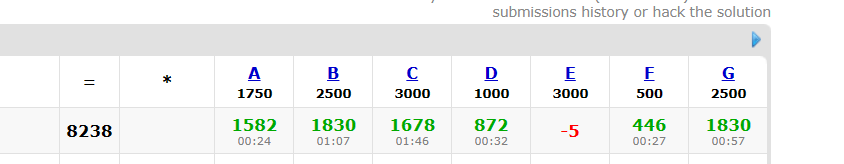

In [7]:
standings=requests.get("https://codeforces.com/api/contest.standings?contestId=566&showUnofficial=true").json()
standings_problems_results=pd.DataFrame(standings['result']['rows'][0]['problemResults'])
standings_problems_results

,points,rejectedAttemptCount,type,bestSubmissionTimeSeconds
0,1582.0,0,FINAL,1476.0
1,1830.0,0,FINAL,4078.0
2,1678.0,1,FINAL,6412.0
3,872.0,0,FINAL,1953.0
4,0.0,5,FINAL,NaN
5,446.0,0,FINAL,1665.0
6,1830.0,2,FINAL,3445.0


## problemset.problems

Returns all problems from problemset. Problems can be filtered by tags.

| Parameter | Description |
| --- |  --- |
| **tags** | Semicilon-separated list of tags. |
| **problemsetName** | Custom problemset's short name, like 'acmsguru' |

**Return value**: Returns two lists. List of [Problem](https://codeforces.com/apiHelp/objects#Problem) objects and list of [ProblemStatistics](https://codeforces.com/apiHelp/objects#ProblemStatistics) objects.

**Example**: <https://codeforces.com/api/problemset.problems?tags=implementation>


#### Problem and statistics

Represents a problem.

| Field | Description |
| --- |  --- |
| contestId | Integer. Can be absent. Id of the contest, containing the problem. |
| problemsetName | String. Can be absent. Short name of the problemset the problem belongs to. |
| index | String. Usually, a letter or letter with digit(s) indicating the problem index in a contest. |
| name | String. Localized. |
| type | Enum: PROGRAMMING, QUESTION. |
| points | Floating point number. Can be absent. Maximum amount of points for the problem. |
| rating | Integer. Can be absent. Problem rating (difficulty). |
| tags | String list. Problem tags. |
| contestId | Integer. Can be absent. Id of the contest, containing the problem. |
| index | String. Usually, a letter or letter with digit(s) indicating the problem index in a contest. |
| solvedCount | Integer. Number of users, who solved the problem. |

In [44]:
problem_data=requests.get("https://codeforces.com/api/problemset.problems?").json()
problems=pd.DataFrame(problem_data['result']['problems'])
Statistics=pd.DataFrame(problem_data['result']['problemStatistics'])
problem_data=pd.concat([problems,Statistics['solvedCount']],axis=1)
problem_data

,contestId,index,name,type,points,rating,tags,solvedCount
0,1823,F,Random Walk,PROGRAMMING,2500.0,2600.0,"[dp, graphs, math, probabilities, trees]",308
1,1823,E,Removing Graph,PROGRAMMING,2000.0,2500.0,"[brute force, dp, games, graphs, math]",696
2,1823,D,Unique Palindromes,PROGRAMMING,2000.0,1900.0,"[constructive algorithms, math, strings]",2056
3,1823,C,Strongly Composite,PROGRAMMING,1250.0,1300.0,"[greedy, math, number theory]",6784
4,1823,B,Sort with Step,PROGRAMMING,1000.0,900.0,"[brute force, math, sortings]",9595
...,...,...,...,...,...,...,...,...
8622,2,B,The least round way,PROGRAMMING,NaN,2000.0,"[dp, math]",8962
8623,2,A,Winner,PROGRAMMING,NaN,1500.0,"[hashing, implementation]",20994
8624,1,C,Ancient Berland Circus,PROGRAMMING,NaN,2100.0,"[geometry, math]",4895
8625,1,B,Spreadsheet,PROGRAMMING,NaN,1600.0,"[implementation, math]",19108


## user.ratedList

Returns the list users who have participated in at least one rated contest.

| Parameter | Description |
| --- |  --- |
| **activeOnly** | Boolean. If true then only users, who participated in rated contest during the last month are returned. Otherwise, all users with at least one rated contest are returned. |
| **includeRetired** | Boolean. If true, the method returns all rated users, otherwise the method returns only users, that were online at last month. |
| **contestId** | Id of the contest. It is **not** the round number. It can be seen in contest URL. For example: [/contest/**566**/status](https://codeforces.com/contest/566/status) |

**Return value**: Returns a list of [User](https://codeforces.com/apiHelp/objects#User) objects, sorted in decreasing order of rating.

**Example**: <https://codeforces.com/api/user.ratedList?activeOnly=true&includeRetired=false>

 <font color="red">**Note:**</font>  we will use  activeOnly=false&includeRetired=false


#### User

Represents a Codeforces user.

| Field | Description |
| --- |  --- |
| handle | String. Codeforces user handle. |
| email | String. Shown only if user allowed to share his contact info. |
| vkId | String. User id for VK social network. Shown only if user allowed to share his contact info. |
| openId | String. Shown only if user allowed to share his contact info. |
| firstName | String. Localized. Can be absent. |
| lastName | String. Localized. Can be absent. |
| country | String. Localized. Can be absent. |
| city | String. Localized. Can be absent. |
| organization | String. Localized. Can be absent. |
| contribution | Integer. User contribution. |
| rank | String. Localized. |
| rating | Integer. |
| maxRank | String. Localized. |
| maxRating | Integer. |
| lastOnlineTimeSeconds | Integer. Time, when user was last seen online, in unix format. |
| registrationTimeSeconds | Integer. Time, when user was registered, in unix format. |
| friendOfCount | Integer. Amount of users who have this user in friends. |
| avatar | String. User's avatar URL. |
| titlePhoto | String. User's title photo URL. |

In [26]:
user_info=requests.get("https://codeforces.com/api/user.ratedList?activeOnly=false&includeRetired=false").json()
user_info=pd.DataFrame(user_info['result'])
user_info

,lastName,country,lastOnlineTimeSeconds,city,rating,friendOfCount,titlePhoto,handle,avatar,firstName,contribution,organization,rank,maxRating,registrationTimeSeconds,maxRank,email,vkId,openId
0,Qi,United States,1683058070,Princeton,3783,12101,https://userpic.codeforces.org/312472/title/7c...,Benq,https://userpic.codeforces.org/312472/avatar/5...,Benjamin,0,MIT,legendary grandmaster,3813,1435099979,legendary grandmaster,NaN,NaN,NaN
1,Korotkevich,Belarus,1683200832,Gomel,3662,54933,https://userpic.codeforces.org/422/title/50a27...,tourist,https://userpic.codeforces.org/422/avatar/2b5d...,Gennady,0,ITMO University,legendary grandmaster,3979,1265987288,legendary grandmaster,NaN,NaN,NaN
2,Jiang,China,1683182728,Chongqing,3614,15438,https://userpic.codeforces.org/887306/title/8a...,jiangly,https://userpic.codeforces.org/887306/avatar/f...,Lingyu,0,Jiangly Fan Club,legendary grandmaster,3859,1547985852,legendary grandmaster,NaN,NaN,NaN
3,Danilyuk,Ukraine,1683179512,Kharkiv,3509,13115,https://userpic.codeforces.org/65550/title/a5b...,Um_nik,https://userpic.codeforces.org/65550/avatar/25...,Alex,0,Um_nik Training Center,legendary grandmaster,3629,1348065816,legendary grandmaster,NaN,NaN,NaN
4,Koo,South Korea,1683165818,Daejeon,3500,2714,https://userpic.codeforces.org/210765/title/7d...,ko_osaga,https://userpic.codeforces.org/210765/avatar/5...,Jaehyun,0,KAIST,legendary grandmaster,3500,1399274936,legendary grandmaster,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111522,NaN,NaN,1682781692,NaN,-41,1,https://userpic.codeforces.org/no-title.jpg,Ivan_Tatarchuk,https://userpic.codeforces.org/no-avatar.jpg,NaN,0,NaN,newbie,740,1600364148,newbie,NaN,NaN,NaN
111523,wang,Taiwan,1683186321,Kaohsiung City,-46,21,https://userpic.codeforces.org/2509199/title/1...,wangba,https://userpic.codeforces.org/2509199/avatar/...,ba,0,8U,newbie,875,1648112840,newbie,NaN,NaN,NaN
111524,NaN,NaN,1683032625,NaN,-48,154,https://userpic.codeforces.org/727941/title/27...,jh05013,https://userpic.codeforces.org/727941/avatar/d...,NaN,0,NaN,newbie,1708,1523433648,expert,jhztfs@gmail.com,NaN,NaN
111525,NaN,NaN,1681281916,NaN,-51,47,https://userpic.codeforces.org/1450002/title/f...,RealRainbow_sjy,https://userpic.codeforces.org/1450002/avatar/...,StonksCF-verify,0,Explosive Vegetable Club,newbie,1364,1585231751,pupil,NaN,NaN,NaN


If we want to extract data of specific user regalrdless of criteria

```python
user_info=requests.get("https://codeforces.com/api/user.info?handles=ozymandiaass;Fefer_Ivan").json()
user_info=pd.DataFrame(user_info['result'])
user_info

```

| lastName | country | lastOnlineTimeSeconds | city | rating | friendOfCount | titlePhoto | handle | avatar | firstName | contribution | organization | rank | maxRating | registrationTimeSeconds | email | maxRank |
| --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |
| 0 | Ahmed | Egypt | 1683204895 | Sohag | 813 | 9 | https://userpic.codeforces.org/1827935/title/8... | ozymandiaass | https://userpic.codeforces.org/1827935/avatar/... | Eslam | 0 | Nile University | newbie | 813 | 1608205842 | eessllaamm1010@gmail.com | newbie |
| 1 | Fefer | Russia | 1672070012 | Saratov | 2174 | 391 | https://userpic.codeforces.org/242/title/151ab... | Fefer\_Ivan | https://userpic.codeforces.org/242/avatar/c4e6... | Ivan | 0 | Booking.com | master | 2476 | 1264960450 | NaN | grandmaster |

## user.rating

Returns rating history of the specified user.

| Parameter | Description |
| --- |  --- |
| **handle** (Required) | Codeforces user handle. |
| --- |  --- |

**Return value**: Returns a list of [RatingChange](https://codeforces.com/apiHelp/objects#RatingChange) objects for requested user.

**Example**: [https://codeforces.com/api/user.rating?handle=Fefer\_Ivan](https://codeforces.com/api/user.rating?handle=Fefer_Ivan)


#### RatingChange

Represents a participation of user in rated contest.

| Field | Description |
| --- |  --- |
| contestId | Integer. |
| contestName | String. Localized. |
| handle | String. Codeforces user handle. |
| rank | Integer. Place of the user in the contest. This field contains user rank on the moment of rating update. If afterwards rank changes (e.g. someone get disqualified), this field will not be update and will contain old rank. |
| ratingUpdateTimeSeconds | Integer. Time, when rating for the contest was update, in unix-format. |
| oldRating | Integer. User rating before the contest. |
| newRating | Integer. User rating after the contest. |

In [31]:
rating_change=requests.get("https://codeforces.com/api/user.rating?handle=ozymandiaass").json()
rating_change=pd.DataFrame(rating_change['result'])
rating_change

,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating
0,1650,Codeforces Round 776 (Div. 3),ozymandiaass,14828,1646758200,0,365
1,1647,Codeforces Round 777 (Div. 2),ozymandiaass,11002,1647016500,365,581
2,1669,Codeforces Round 784 (Div. 4),ozymandiaass,14197,1650558900,581,728
3,1742,Codeforces Round 827 (Div. 4),ozymandiaass,13705,1665680400,728,813


### contest.status

Returns submissions for specified contest. Optionally can return submissions of specified user.  

### <font color="red">Note:</font> submissions in here are not specifically a contest submissions but it is a problem submssion

| Parameter | Description |
| --- |  --- |
| **contestId** (Required) | Id of the contest. It is **not** the round number. It can be seen in contest URL. For example: [/contest/**566**/status](https://codeforces.com/contest/566/status) |
| **handle** | Codeforces user handle. |
| **from** | 1-based index of the first submission to return. |
| **count** | Number of returned submissions. |

**Return value**: Returns a list of [Submission](https://codeforces.com/apiHelp/objects#Submission) objects, sorted in decreasing order of submission id.

**Example**: <https://codeforces.com/api/contest.status?contestId=566&from=1&count=10>


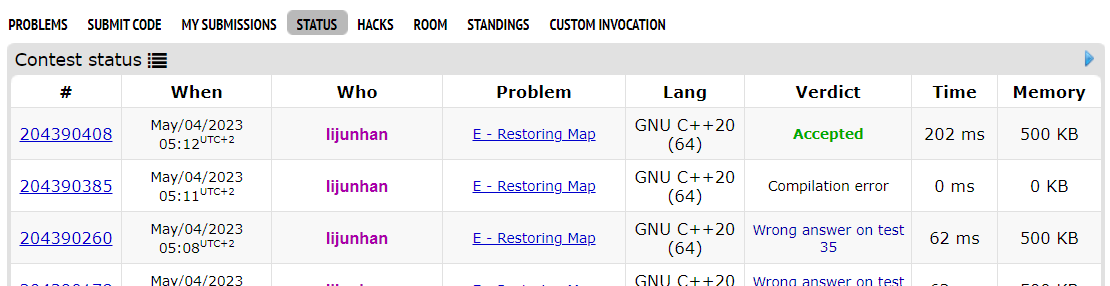



#### Submission

Represents a submission.

| Field | Description |
| --- |  --- |
| id | Integer. |
| contestId | Integer. Can be absent. |
| creationTimeSeconds | Integer. Time, when submission was created, in unix-format. |
| relativeTimeSeconds | Integer. Number of seconds, passed after the start of the contest (or a virtual start for virtual parties), before the submission. |
| problem | [Problem](https://codeforces.com/apiHelp/objects#Problem) object. |
| author | [Party](https://codeforces.com/apiHelp/objects#Party) object. |
| programmingLanguage | String. |
| verdict | Enum: FAILED, OK, PARTIAL, COMPILATION\_ERROR, RUNTIME\_ERROR, WRONG\_ANSWER, PRESENTATION\_ERROR, TIME\_LIMIT\_EXCEEDED, MEMORY\_LIMIT\_EXCEEDED, IDLENESS\_LIMIT\_EXCEEDED, SECURITY\_VIOLATED, CRASHED, INPUT\_PREPARATION\_CRASHED, CHALLENGED, SKIPPED, TESTING, REJECTED. Can be absent. |
| testset | Enum: SAMPLES, PRETESTS, TESTS, CHALLENGES, TESTS1, ..., TESTS10. Testset used for judging the submission. |
| passedTestCount | Integer. Number of passed tests. |
| timeConsumedMillis | Integer. Maximum time in milliseconds, consumed by solution for one test. |
| memoryConsumedBytes | Integer. Maximum memory in bytes, consumed by solution for one test. |
| points | Floating point number. Can be absent. Number of scored points for IOI-like contests. |


In [36]:
submissions=requests.get("https://codeforces.com/api/contest.status?contestId=566").json()
contest_submissions=pd.DataFrame(submissions['result'])
contest_submissions

,id,contestId,creationTimeSeconds,relativeTimeSeconds,problem,author,programmingLanguage,verdict,testset,passedTestCount,timeConsumedMillis,memoryConsumedBytes
0,204390408,566,1683169946,2147483647,"{'contestId': 566, 'index': 'E', 'name': 'Rest...","{'contestId': 566, 'members': [{'handle': 'lij...",GNU C++20 (64),OK,TESTS,138,202,512000
1,204390385,566,1683169912,2147483647,"{'contestId': 566, 'index': 'E', 'name': 'Rest...","{'contestId': 566, 'members': [{'handle': 'lij...",GNU C++20 (64),COMPILATION_ERROR,TESTS,0,0,0
2,204390260,566,1683169721,2147483647,"{'contestId': 566, 'index': 'E', 'name': 'Rest...","{'contestId': 566, 'members': [{'handle': 'lij...",GNU C++20 (64),WRONG_ANSWER,TESTS,34,62,512000
3,204390178,566,1683169593,2147483647,"{'contestId': 566, 'index': 'E', 'name': 'Rest...","{'contestId': 566, 'members': [{'handle': 'lij...",GNU C++20 (64),WRONG_ANSWER,TESTS,12,62,512000
4,204390074,566,1683169453,2147483647,"{'contestId': 566, 'index': 'E', 'name': 'Rest...","{'contestId': 566, 'members': [{'handle': 'lij...",GNU C++20 (64),WRONG_ANSWER,TESTS,11,62,512000
...,...,...,...,...,...,...,...,...,...,...,...,...
32960,12277322,566,1438273470,270,"{'contestId': 566, 'index': 'F', 'name': 'Cliq...","{'contestId': 566, 'members': [{'handle': 'ami...",GNU C++11,OK,TESTS,38,202,8089600
32961,12277319,566,1438273459,259,"{'contestId': 566, 'index': 'F', 'name': 'Cliq...","{'contestId': 566, 'members': [{'handle': 'ant...",GNU C++11,OK,TESTS,38,218,8192000
32962,12277312,566,1438273402,202,"{'contestId': 566, 'index': 'F', 'name': 'Cliq...","{'contestId': 566, 'members': [{'handle': 'sak...",GNU C++,OK,TESTS,38,717,7987200
32963,12277309,566,1438273356,156,"{'contestId': 566, 'index': 'F', 'name': 'Cliq...","{'contestId': 566, 'members': [{'handle': 'I_l...",GNU C++11,OK,TESTS,38,701,8396800


In [79]:
contest_submissions=pd.DataFrame(submissions['result'][0]['problem'])
contest_submissions

,contestId,index,name,type,points,rating,tags
0,566,E,Restoring Map,PROGRAMMING,3000.0,3200,bitmasks
1,566,E,Restoring Map,PROGRAMMING,3000.0,3200,constructive algorithms
2,566,E,Restoring Map,PROGRAMMING,3000.0,3200,trees


In [35]:
contest_submissions=pd.DataFrame(submissions['result'][0]['author'])
contest_submissions

,contestId,members,participantType,ghost,startTimeSeconds
0,566,{'handle': 'lijunhan'},PRACTICE,False,1438273200


## user.status

Returns submissions of specified user.

### <font color="red">Note:</font> submissions in here are not specifically a contest submissions but it is a problem submssion

| Parameter | Description |
| --- |  --- |
| **handle** (Required) | Codeforces user handle. |
| **from** | 1-based index of the first submission to return. |
| **count** | Number of returned submissions. |

**Return value**: Returns a list of [Submission](https://codeforces.com/apiHelp/objects#Submission) objects, sorted in decreasing order of submission id.

**Example**: [https://codeforces.com/api/user.status?handle=Fefer\_Ivan&from=1&count=10](https://codeforces.com/api/user.status?handle=Fefer_Ivan&from=1&count=10)


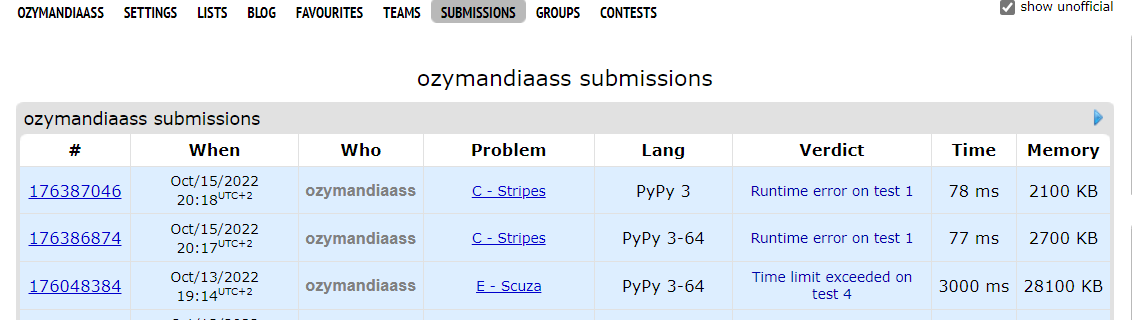

In [38]:
user_sub=requests.get("https://codeforces.com/api/user.status?handle=ozymandiaass").json()
user_sub=pd.DataFrame(user_sub['result'])
user_sub

,id,contestId,creationTimeSeconds,relativeTimeSeconds,problem,author,programmingLanguage,verdict,testset,passedTestCount,timeConsumedMillis,memoryConsumedBytes
0,176387046,1742,1665857921,2147483647,"{'contestId': 1742, 'index': 'C', 'name': 'Str...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3,RUNTIME_ERROR,TESTS,0,78,2150400
1,176386874,1742,1665857858,2147483647,"{'contestId': 1742, 'index': 'C', 'name': 'Str...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3-64,RUNTIME_ERROR,TESTS,0,77,2764800
2,176048384,1742,1665681293,2147483647,"{'contestId': 1742, 'index': 'E', 'name': 'Scu...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3-64,TIME_LIMIT_EXCEEDED,TESTS,3,3000,28774400
3,176046211,1742,1665680725,2147483647,"{'contestId': 1742, 'index': 'E', 'name': 'Scu...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3-64,WRONG_ANSWER,TESTS,0,46,0
4,176045992,1742,1665680679,2147483647,"{'contestId': 1742, 'index': 'E', 'name': 'Scu...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3-64,WRONG_ANSWER,TESTS,0,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,101501222,4,1608207321,2147483647,"{'contestId': 4, 'index': 'A', 'name': 'Waterm...","{'contestId': 4, 'members': [{'handle': 'ozyma...",Python 3,WRONG_ANSWER,TESTS,4,216,0
153,101501135,4,1608207255,2147483647,"{'contestId': 4, 'index': 'A', 'name': 'Waterm...","{'contestId': 4, 'members': [{'handle': 'ozyma...",Python 3,WRONG_ANSWER,TESTS,4,218,0
154,101500227,4,1608206555,2147483647,"{'contestId': 4, 'index': 'A', 'name': 'Waterm...","{'contestId': 4, 'members': [{'handle': 'ozyma...",Python 3,WRONG_ANSWER,TESTS,4,186,0
155,101499990,4,1608206363,2147483647,"{'contestId': 4, 'index': 'A', 'name': 'Waterm...","{'contestId': 4, 'members': [{'handle': 'ozyma...",Python 3,WRONG_ANSWER,TESTS,1,186,0


In [22]:
user_sub=requests.get("https://codeforces.com/api/user.status?handle=ozymandiaass").json()
user_sub=pd.DataFrame(user_sub['result'][0]['problem'])
user_sub.head()

,contestId,index,name,type,rating,tags
0,1742,C,Stripes,PROGRAMMING,900,implementation


In [28]:
user_sub=requests.get("https://codeforces.com/api/user.status?handle=ozymandiaass").json()
user_sub=pd.DataFrame(user_sub['result'][0]['author'])
user_sub.head()

,contestId,members,participantType,ghost,startTimeSeconds
0,1742,{'handle': 'ozymandiaass'},PRACTICE,False,1665671700
